# OverSampling Techniques
- Random Over Sampling
- SMOTE
    - Borderline SMOTE
    - SVM SMOTE
    - KMeans SMOTE
- ADASYN

In [1]:
import warnings
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
df_train = pd.read_csv('train.csv')

# Data Pre-processing
df_train['is_anomaly'] = np.where(df_train['is_anomaly'] == False, 0, 1) 
df_train["Is_anomaly"] = df_train['is_anomaly'].values

df_train.drop('is_anomaly', axis = 1 ,inplace = True)

X_train = df_train[['value','predicted']]
y_train = df_train['Is_anomaly']
df_train.head(10)

,timestamp,value,predicted,Is_anomaly
0,1425008573,42,44.072500,0
1,1425008873,41,50.709390,0
2,1425009173,41,81.405120,0
3,1425009473,61,39.950367,0
4,1425009773,44,35.350160,0
5,1425010073,27,27.713638,0
6,1425010373,37,41.545710,0
7,1425010673,36,38.743620,0
8,1425010973,49,40.859787,0
9,1425011273,36,25.444733,0


- Define plot functions

In [2]:
def plot_resampling(X, y, sampler, ax, title=None):
    X_res, y_res = sampler.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor="k")
    if title is None:
        title = f"Resampling with {sampler.__class__.__name__}"
    ax.set_title(title)
    sns.despine(ax=ax, offset=10)

In [3]:
def plot_decision_function(X, y, clf, ax, title=None):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step), copy = True
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor="k")
    if title is not None:
        ax.set_title(title)

- Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

std_scaler = StandardScaler()
mmx_scaler = MinMaxScaler()
rob_scaler = RobustScaler()

# Create scaled datasets 
X_train_S = pd.DataFrame(std_scaler.fit_transform(X_train))
X_train_R = pd.DataFrame(rob_scaler.fit_transform(X_train))
X_train_M = pd.DataFrame(mmx_scaler.fit_transform(X_train))

- Over Sampling Techniques

In [5]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler,ADASYN, SMOTE, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE

# Over Samplers 
rs           = RandomOverSampler(sampling_strategy = 0.7, random_state = 99)
adasyn       = ADASYN(sampling_strategy = 0.7, random_state = 99, n_neighbors =5)
smote        = SMOTE(sampling_strategy = 0.7, random_state = 99, k_neighbors = 5)
svm_smote    = SVMSMOTE(sampling_strategy = 0.7, random_state = 99, k_neighbors = 5)
border_smote = BorderlineSMOTE(sampling_strategy = 0.7, random_state = 99, k_neighbors = 5)
kmeans_smote = KMeansSMOTE(sampling_strategy = 0.7, random_state = 99, k_neighbors = 5)

# Fit Over Samplers with different Scaled Features to choose from
# Random Over Samplers
X_rs_S, y_rs_S = rs.fit_resample(X_train_S, y_train)
X_rs_R, y_rs_R = rs.fit_resample(X_train_R, y_train)
X_rs_M, y_rs_M = rs.fit_resample(X_train_M, y_train)

# ADASYN Samplers
X_ada_S, y_ada_S = adasyn.fit_resample(X_train_S, y_train)
X_ada_R, y_ada_R = adasyn.fit_resample(X_train_R, y_train)
X_ada_M, y_ada_M = adasyn.fit_resample(X_train_M, y_train)

# SMOTE Samplers
X_smote_S, y_smote_S = smote.fit_resample(X_train_S, y_train)
X_smote_R, y_smote_R = smote.fit_resample(X_train_R, y_train)
X_smote_M, y_smote_M = smote.fit_resample(X_train_M, y_train)

# SVM SMOTE Samplers
X_svm_S, y_svm_S = svm_smote.fit_resample(X_train_S, y_train)
X_svm_R, y_svm_R = svm_smote.fit_resample(X_train_R, y_train)
X_svm_M, y_svm_M = svm_smote.fit_resample(X_train_M, y_train)

# Borderline SMOTE Samplers
X_border_S, y_border_S = border_smote.fit_resample(X_train_S, y_train)
X_border_R, y_border_R = border_smote.fit_resample(X_train_R, y_train)
X_border_M, y_border_M = border_smote.fit_resample(X_train_M, y_train)

# K-Means SMOTE Samplers
X_kmeans_S, y_kmeans_S = kmeans_smote.fit_resample(X_train_S, y_train)
X_kmeans_R, y_kmeans_R = kmeans_smote.fit_resample(X_train_R, y_train)
X_kmeans_M, y_kmeans_M = kmeans_smote.fit_resample(X_train_M, y_train)

print('Classes before fit {}'.format(Counter(y_train)))
print('Classes after  Random Over Sampling (Standard Scaling) {}'.format(Counter(y_rs_S)))
print('Classes after  Random Over Sampling (Robust   Scaling) {}'.format(Counter(y_rs_R)))
print('Classes after  Random Over Sampling (Min-Max  Scaling) {}'.format(Counter(y_rs_M)))

print('Classes after  ADASYN (Standard Scaling) {}'.format(Counter(y_ada_S)))
print('Classes after  ADASYN (Robust   Scaling) {}'.format(Counter(y_ada_R)))
print('Classes after  ADASYN (Min-Max  Scaling) {}'.format(Counter(y_ada_M)))

print('Classes after  SMOTE (Standard Scaling) {}'.format(Counter(y_smote_S)))
print('Classes after  SMOTE (Robust   Scaling) {}'.format(Counter(y_smote_R)))
print('Classes after  SMOTE (Min-Max  Scaling) {}'.format(Counter(y_smote_M)))

print('Classes after  Borderline SMOTE (Standard Scaling) {}'.format(Counter(y_border_S)))
print('Classes after  Borderline SMOTE (Robust   Scaling) {}'.format(Counter(y_border_R)))
print('Classes after  Borderline SMOTE (Min-Max  Scaling) {}'.format(Counter(y_border_M)))

print('Classes after  K-means SMOTE (Standard Scaling) {}'.format(Counter(y_svm_S)))
print('Classes after  K-means SMOTE (Robust   Scaling) {}'.format(Counter(y_svm_R)))
print('Classes after  K-means SMOTE (Min-Max  Scaling) {}'.format(Counter(y_svm_M)))

Classes before fit Counter({0: 15054, 1: 776})
Classes after  Random Over Sampling (Standard Scaling) Counter({0: 15054, 1: 10537})
Classes after  Random Over Sampling (Robust   Scaling) Counter({0: 15054, 1: 10537})
Classes after  Random Over Sampling (Min-Max  Scaling) Counter({0: 15054, 1: 10537})
Classes after  ADASYN (Standard Scaling) Counter({0: 15054, 1: 10548})
Classes after  ADASYN (Robust   Scaling) Counter({0: 15054, 1: 10515})
Classes after  ADASYN (Min-Max  Scaling) Counter({0: 15054, 1: 10588})
Classes after  SMOTE (Standard Scaling) Counter({0: 15054, 1: 10537})
Classes after  SMOTE (Robust   Scaling) Counter({0: 15054, 1: 10537})
Classes after  SMOTE (Min-Max  Scaling) Counter({0: 15054, 1: 10537})
Classes after  Borderline SMOTE (Standard Scaling) Counter({0: 15054, 1: 10537})
Classes after  Borderline SMOTE (Robust   Scaling) Counter({0: 15054, 1: 10537})
Classes after  Borderline SMOTE (Min-Max  Scaling) Counter({0: 15054, 1: 10537})
Classes after  K-means SMOTE (St

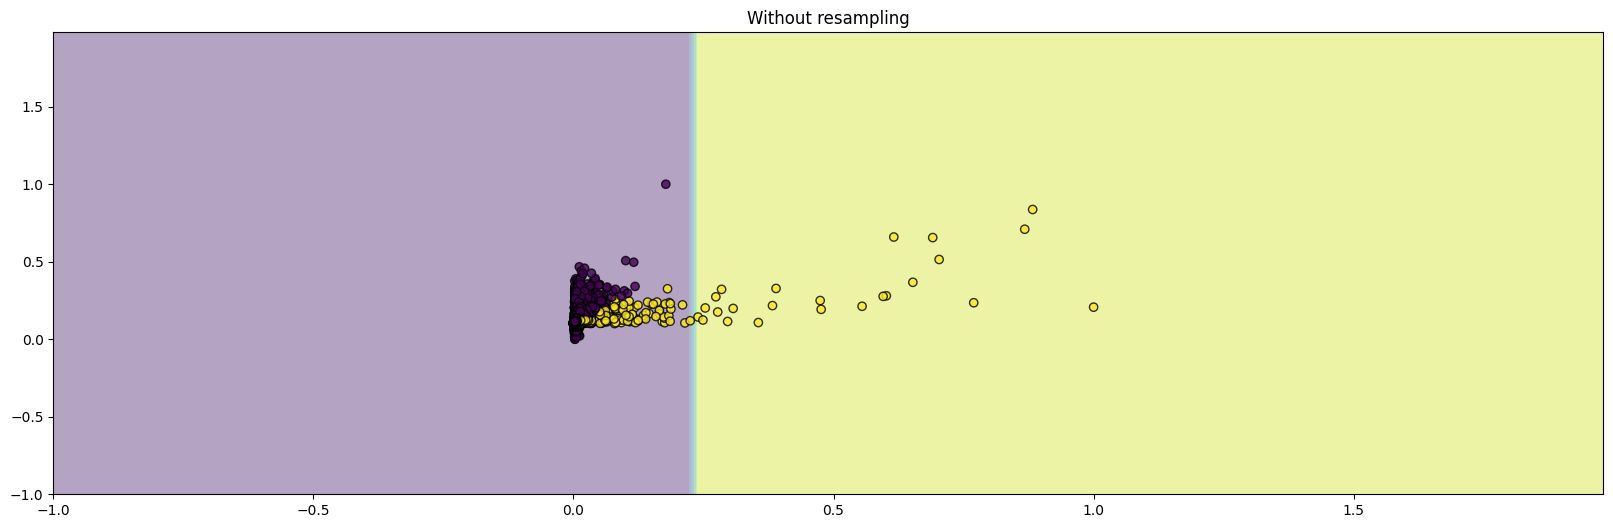

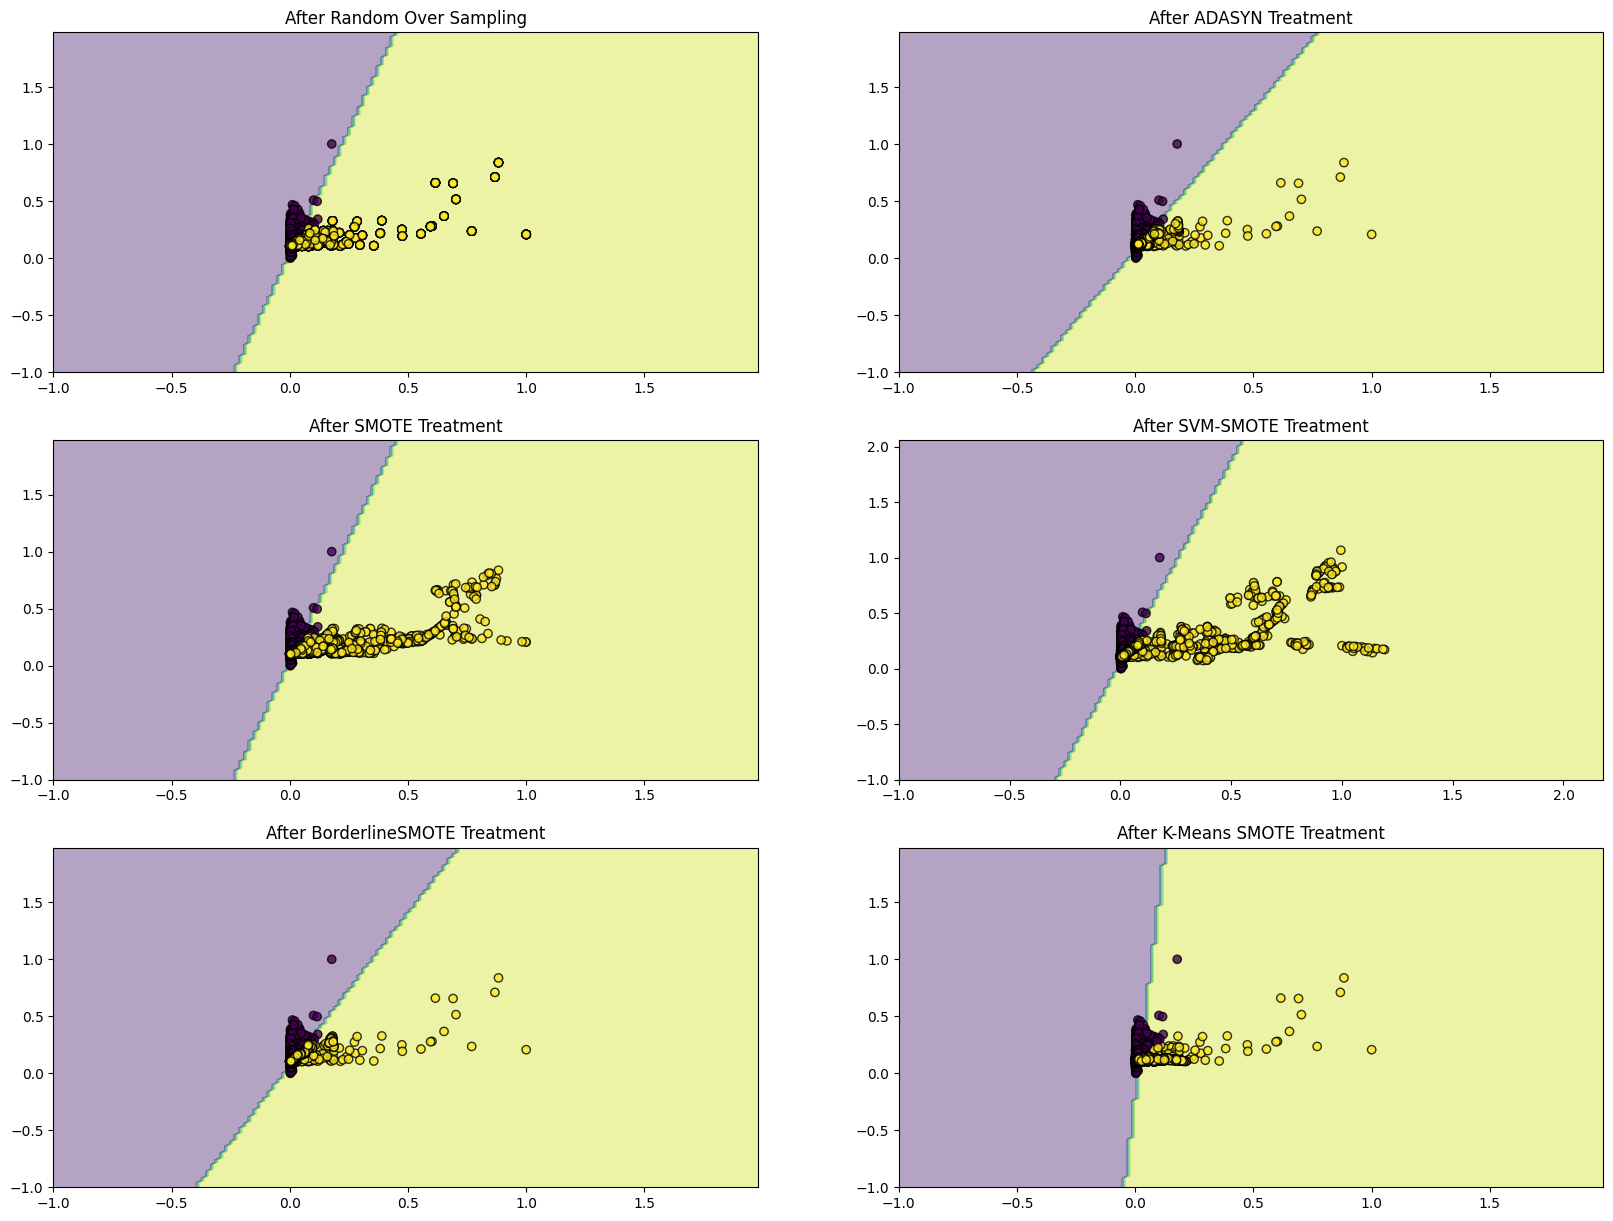

In [6]:
# Specify models - choose type of scaling (Min-Max Scaling)
model_Imbalanced = LogisticRegression().fit(X_train_M, y_train)
model_RandomOver = LogisticRegression().fit(X_rs_M, y_rs_M)
model_ADASYN     = LogisticRegression().fit(X_ada_M, y_ada_M)
model_SMOTE      = LogisticRegression().fit(X_smote_M, y_smote_M)
model_SVM_SMOTE  = LogisticRegression().fit(X_svm_M, y_svm_M)
model_Bor_SMOTE  = LogisticRegression().fit(X_border_M, y_border_M)
model_kMn_SMOTE  = LogisticRegression().fit(X_kmeans_M, y_kmeans_M)

# Plot the models and their decision function
fig, ax = plt.subplots( figsize=(20, 6))
plot_decision_function(X_train_M.to_numpy(), y_train.to_numpy(), model_Imbalanced, ax, title="Without resampling")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
plot_decision_function(X_rs_M.to_numpy(), y_rs_M.to_numpy(), model_RandomOver, axs[0,0], title="After Random Over Sampling")
plot_decision_function(X_ada_M.to_numpy(), y_ada_M.to_numpy(), model_ADASYN, axs[0,1], title="After ADASYN Treatment")

plot_decision_function(X_smote_M.to_numpy(), y_smote_M.to_numpy(), model_SMOTE, axs[1,0], title="After SMOTE Treatment")
plot_decision_function(X_svm_M.to_numpy(), y_svm_M.to_numpy(), model_SVM_SMOTE, axs[1,1], title="After SVM-SMOTE Treatment")

plot_decision_function(X_border_M.to_numpy(), y_border_M.to_numpy(), model_Bor_SMOTE, axs[2,0], title="After BorderlineSMOTE Treatment")
plot_decision_function(X_kmeans_M.to_numpy(), y_kmeans_M.to_numpy(), model_kMn_SMOTE, axs[2,1], title="After K-Means SMOTE Treatment")